## Mapping synthetic PHS-EPCC data

### Setting up the directories
Refresh the folders for the output (OMOP mapped) data

In [1]:
! rm -rf output_data/smr01
! rm -rf output_data/deaths
! mkdir output_data/smr01
! mkdir output_data/deaths

List the files in the synthetic data folders 

In [2]:
! tree synthetic_data/

synthetic_data/
├── deaths
│   ├── deaths_a.csv
│   ├── deaths_b.csv
│   └── demographics.csv
├── person_ids.tsv
└── smr01
    ├── demographics.csv
    ├── smr01_conditions.csv
    └── smr01_operations.csv

3 directories, 7 files


Check the size of the files that we are going to process:

In [3]:
!du -ch synthetic_data/*

344M	synthetic_data/deaths
465M	synthetic_data/person_ids.tsv
1.2G	synthetic_data/smr01
2.0G	total


Check the file 'person_ids' - this maps between the person_id (integer for CDM) and the original encrypted_id in the original dataset. We'll use it for all datasets to preserve a link between the OMOP person_id across all datasets.

In [4]:
!head -10 synthetic_data/person_ids.tsv

SOURCE_SUBJECT	TARGET_SUBJECT
1	71e89a35-3858-495f-a0dc-7b392bacdd37
2	4a2036ce-efe8-49a8-adec-a45c823046bf
3	b38576e9-8fae-4776-ab35-f3bf6ff6d754
4	6528c6c7-57f9-482d-abfe-aa10c6d17761
5	38ca4861-cb0e-4d22-9db4-3bdabfdedc98
6	a427b021-be75-4b9b-b4c8-46f79ae8556c
7	59024486-22a0-4d59-b912-9779a705014c
8	e7365db6-37f4-429e-8247-5c2bc6d17273
9	0f19dd3c-ec65-424e-9a4f-e0ea7edf774e


Copy over the `person_ids.tsv` file into the respective output directories.

By doing this, and using `--write-mode a`, carrot-cdm will be able to pick up the `person_ids` and be able to apply them.

In [5]:
! cp synthetic_data/person_ids.tsv output_data/smr01/
! cp synthetic_data/person_ids.tsv output_data/deaths/

### Display the mapping rules

Check the mapping rules file(s)

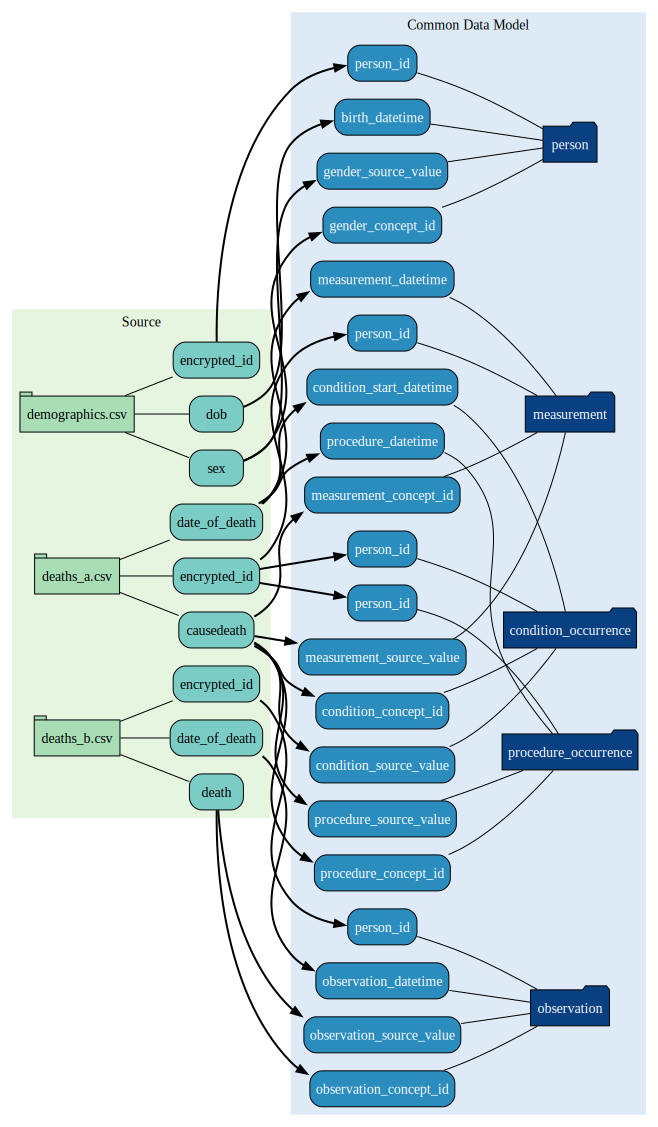

In [6]:
import carrot 
import carrot.tools as tools
from IPython.display import SVG

def show_rules(fname):
    data = tools.load_json(fname)['cdm']
    svg = tools.make_dag(data)
    return SVG(svg)

show_rules('rules_deaths.json')

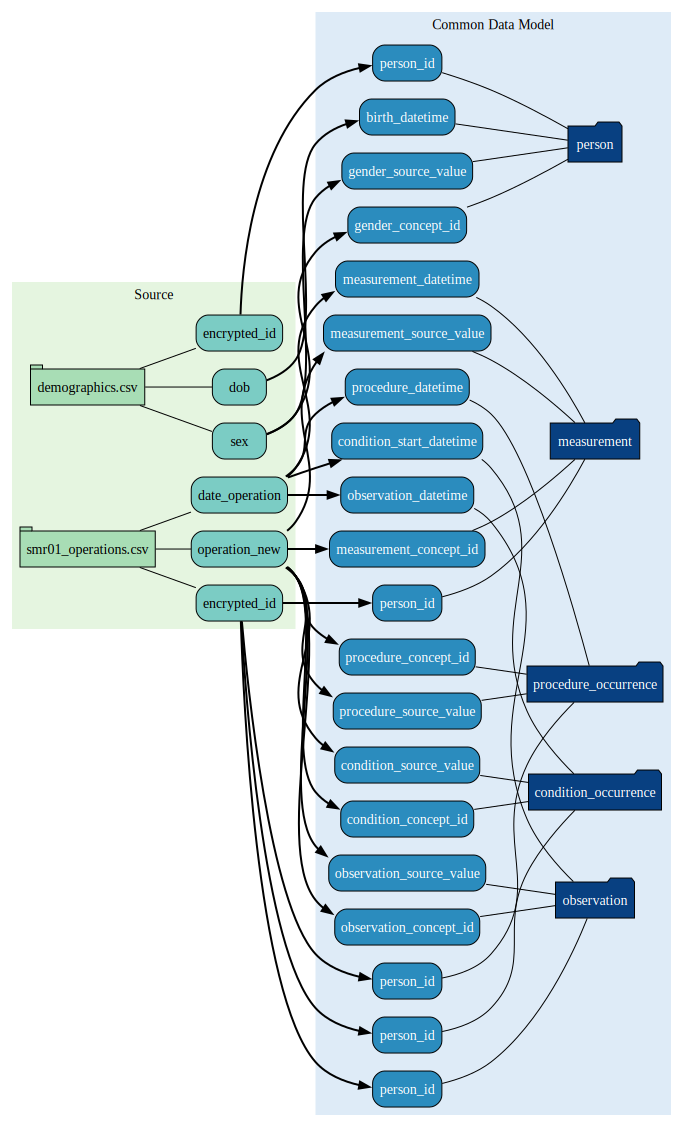

In [7]:
show_rules('rules_smr01.json')

### Mapping SMR01

Start by mapping SMR01 records in chunks of 1M rules

In [8]:
%%time

! carrot run map \
       --rules rules_smr01.json \
       --output-folder output_data/smr01/ \
       --write-mode a \
       --number-of-rows-per-chunk 1e6 \
       synthetic_data/smr01/

2024-03-21 14:49:18 - LocalDataCollection - INFO - DataCollection Object Created
2024-03-21 14:49:18 - LocalDataCollection - INFO - Using a chunksize of '1000000' nrows
2024-03-21 14:49:18 - LocalDataCollection - INFO - Registering  smr01_operations.csv [<carrot.io.common.DataBrick object at 0x120ae1910>]
2024-03-21 14:49:18 - LocalDataCollection - INFO - Registering  demographics.csv [<carrot.io.common.DataBrick object at 0x120ae1bb0>]
2024-03-21 14:49:18 - LocalDataCollection - INFO - DataCollection Object Created
2024-03-21 14:49:18 - CommonDataModel - INFO - CommonDataModel (5.3.1) created with co-connect-tools version 0.6.85
2024-03-21 14:49:18 - CommonDataModel - INFO - Running with an DataCollection object
2024-03-21 14:49:18 - CommonDataModel - INFO - Turning on automatic cdm column filling
2024-03-21 14:49:18 - LocalDataCollection - WARNING - Loading existing person ids from...
2024-03-21 14:49:18 - LocalDataCollection - WARNING - ['output_data/smr01/person_ids.tsv']
2024-03-2

2024-03-21 14:50:21 - Person - INFO - Automatically formatting data columns.
2024-03-21 14:50:23 - Person - INFO - created df (0x17b42e2b0)[person_0]
2024-03-21 14:50:24 - CommonDataModel - INFO - finished person_0 (0x17b42e2b0) ... 1/1 completed, 700986 rows
2024-03-21 14:50:25 - LocalDataCollection - INFO - updating person_ids in output_data/smr01//person_ids.tsv
2024-03-21 14:50:26 - LocalDataCollection - INFO - finished save to file
2024-03-21 14:50:35 - CommonDataModel - INFO - saving dataframe (0x17b42e2b0) to <carrot.io.plugins.local.LocalDataCollection object at 0x120ae15e0>
2024-03-21 14:50:35 - LocalDataCollection - INFO - updating person in output_data/smr01//person.tsv
2024-03-21 14:50:39 - LocalDataCollection - INFO - finished save to file
2024-03-21 14:50:39 - CommonDataModel - INFO - finalised person on iteration 2 producing 700986 rows from 1 tables
2024-03-21 14:50:39 - LocalDataCollection - INFO - Getting next chunk of data
2024-03-21 14:50:39 - LocalDataCollection - 

2024-03-21 14:51:46 - LocalDataCollection - INFO - --> Got 1000000 rows
2024-03-21 14:51:46 - CommonDataModel - INFO - for person: found 1 object
2024-03-21 14:51:46 - CommonDataModel - INFO - working on person
2024-03-21 14:51:46 - CommonDataModel - INFO - starting on person_0
2024-03-21 14:51:46 - Person - INFO - Called apply_rules
2024-03-21 14:51:47 - Person - INFO - Mapped person_id
2024-03-21 14:51:47 - Person - INFO - Mapped birth_datetime
2024-03-21 14:51:47 - Person - INFO - Mapped gender_concept_id
2024-03-21 14:51:47 - Person - INFO - Mapped gender_source_value
2024-03-21 14:51:50 - Person - WARNING - Requiring non-null values in gender_concept_id removed 301031 rows, leaving 698969 rows.
2024-03-21 14:51:50 - Person - INFO - Automatically formatting data columns.
2024-03-21 14:51:52 - Person - INFO - created df (0x17b42e040)[person_0]
2024-03-21 14:51:52 - CommonDataModel - INFO - finished person_0 (0x17b42e040) ... 1/1 completed, 698969 rows
2024-03-21 14:51:53 - LocalData

2024-03-21 14:52:47 - Person - INFO - Automatically formatting data columns.
2024-03-21 14:52:48 - Person - INFO - created df (0x17b42e340)[person_0]
2024-03-21 14:52:49 - CommonDataModel - INFO - finished person_0 (0x17b42e340) ... 1/1 completed, 700059 rows
2024-03-21 14:52:50 - LocalDataCollection - INFO - updating person_ids in output_data/smr01//person_ids.tsv
2024-03-21 14:52:51 - LocalDataCollection - INFO - finished save to file
2024-03-21 14:52:59 - CommonDataModel - INFO - saving dataframe (0x17b42e340) to <carrot.io.plugins.local.LocalDataCollection object at 0x120ae15e0>
2024-03-21 14:52:59 - LocalDataCollection - INFO - updating person in output_data/smr01//person.tsv
2024-03-21 14:53:02 - LocalDataCollection - INFO - finished save to file
2024-03-21 14:53:02 - CommonDataModel - INFO - finalised person on iteration 9 producing 700059 rows from 1 tables
2024-03-21 14:53:02 - LocalDataCollection - INFO - Getting next chunk of data
2024-03-21 14:53:02 - LocalDataCollection - 

2024-03-21 14:53:39 - LocalDataCollection - INFO - --> Got 1000000 rows
2024-03-21 14:53:39 - CommonDataModel - INFO - for condition_occurrence: found 1 object
2024-03-21 14:53:39 - CommonDataModel - INFO - working on condition_occurrence
2024-03-21 14:53:39 - CommonDataModel - INFO - starting on condition_occurrence_0
2024-03-21 14:53:39 - ConditionOccurrence - INFO - Called apply_rules
2024-03-21 14:53:39 - ConditionOccurrence - INFO - Mapped person_id
2024-03-21 14:53:39 - ConditionOccurrence - INFO - Mapped condition_start_datetime
2024-03-21 14:53:39 - ConditionOccurrence - INFO - Mapped condition_concept_id
2024-03-21 14:53:39 - ConditionOccurrence - INFO - Mapped condition_source_value
2024-03-21 14:53:41 - ConditionOccurrence - ERROR - Requiring non-null values in person_id removed 1017814 rows, leaving 0 rows.
2024-03-21 14:53:41 - ConditionOccurrence - INFO - Automatically formatting data columns.
2024-03-21 14:53:41 - ConditionOccurrence - INFO - created df (0x174b31460)[con

2024-03-21 14:53:55 - ConditionOccurrence - INFO - Mapped condition_start_datetime
2024-03-21 14:53:55 - ConditionOccurrence - INFO - Mapped condition_concept_id
2024-03-21 14:53:55 - ConditionOccurrence - INFO - Mapped condition_source_value
2024-03-21 14:53:57 - ConditionOccurrence - ERROR - Requiring non-null values in person_id removed 1017503 rows, leaving 0 rows.
2024-03-21 14:53:57 - ConditionOccurrence - INFO - Automatically formatting data columns.
2024-03-21 14:53:57 - ConditionOccurrence - INFO - created df (0x17b440520)[condition_occurrence_0]
2024-03-21 14:53:57 - CommonDataModel - INFO - finished condition_occurrence_0 (0x17b440520) ... 1/1 completed, 0 rows
2024-03-21 14:53:57 - CommonDataModel - WARNING - .. no outputs were found 
2024-03-21 14:53:57 - CommonDataModel - INFO - finalised condition_occurrence on iteration 6 producing 0 rows from 0 tables
2024-03-21 14:53:57 - LocalDataCollection - INFO - Getting next chunk of data
2024-03-21 14:53:57 - LocalDataCollection

2024-03-21 14:54:12 - ConditionOccurrence - INFO - Mapped condition_concept_id
2024-03-21 14:54:12 - ConditionOccurrence - INFO - Mapped condition_source_value
2024-03-21 14:54:13 - ConditionOccurrence - ERROR - Requiring non-null values in person_id removed 839880 rows, leaving 0 rows.
2024-03-21 14:54:13 - ConditionOccurrence - INFO - Automatically formatting data columns.
2024-03-21 14:54:13 - ConditionOccurrence - INFO - created df (0x174b316d0)[condition_occurrence_0]
2024-03-21 14:54:13 - CommonDataModel - INFO - finished condition_occurrence_0 (0x174b316d0) ... 1/1 completed, 0 rows
2024-03-21 14:54:13 - CommonDataModel - WARNING - .. no outputs were found 
2024-03-21 14:54:13 - CommonDataModel - INFO - finalised condition_occurrence on iteration 10 producing 0 rows from 0 tables
2024-03-21 14:54:13 - LocalDataCollection - INFO - Getting next chunk of data
2024-03-21 14:54:13 - LocalDataCollection - INFO - Getting the next chunk of size '1000000' for 'smr01_operations.csv'
2024-

2024-03-21 14:54:38 - Measurement - INFO - Mapped measurement_concept_id
2024-03-21 14:54:39 - Measurement - INFO - Mapped measurement_source_value
2024-03-21 14:54:41 - Measurement - ERROR - Requiring non-null values in person_id removed 1000000 rows, leaving 0 rows.
2024-03-21 14:54:41 - Measurement - INFO - Automatically formatting data columns.
2024-03-21 14:54:41 - Measurement - INFO - created df (0x18160f220)[measurement_1]
2024-03-21 14:54:41 - CommonDataModel - INFO - finished measurement_1 (0x18160f220) ... 1/1 completed, 0 rows
2024-03-21 14:54:41 - CommonDataModel - WARNING - .. no outputs were found 
2024-03-21 14:54:41 - CommonDataModel - INFO - finalised measurement on iteration 3 producing 0 rows from 0 tables
2024-03-21 14:54:41 - LocalDataCollection - INFO - Getting next chunk of data
2024-03-21 14:54:41 - LocalDataCollection - INFO - Getting the next chunk of size '1000000' for 'smr01_operations.csv'
2024-03-21 14:54:43 - LocalDataCollection - INFO - --> Got 1000000 r

2024-03-21 14:55:03 - LocalDataCollection - INFO - --> Got 1000000 rows
2024-03-21 14:55:03 - CommonDataModel - INFO - for measurement: found 1 object
2024-03-21 14:55:03 - CommonDataModel - INFO - working on measurement
2024-03-21 14:55:03 - CommonDataModel - INFO - starting on measurement_1
2024-03-21 14:55:03 - Measurement - INFO - Called apply_rules
2024-03-21 14:55:03 - Measurement - INFO - Mapped person_id
2024-03-21 14:55:03 - Measurement - INFO - Mapped measurement_datetime
2024-03-21 14:55:03 - Measurement - INFO - Mapped measurement_concept_id
2024-03-21 14:55:03 - Measurement - INFO - Mapped measurement_source_value
2024-03-21 14:55:05 - Measurement - ERROR - Requiring non-null values in person_id removed 1000000 rows, leaving 0 rows.
2024-03-21 14:55:06 - Measurement - INFO - Automatically formatting data columns.
2024-03-21 14:55:06 - Measurement - INFO - created df (0x120ae1b50)[measurement_1]
2024-03-21 14:55:06 - CommonDataModel - INFO - finished measurement_1 (0x120ae1

2024-03-21 14:55:32 - LocalDataCollection - INFO - --> Got 1000000 rows
2024-03-21 14:55:32 - CommonDataModel - INFO - for observation: found 1 object
2024-03-21 14:55:32 - CommonDataModel - INFO - working on observation
2024-03-21 14:55:32 - CommonDataModel - INFO - starting on observation_2
2024-03-21 14:55:32 - Observation - INFO - Called apply_rules
2024-03-21 14:55:32 - Observation - INFO - Mapped person_id
2024-03-21 14:55:32 - Observation - INFO - Mapped observation_datetime
2024-03-21 14:55:32 - Observation - INFO - Mapped observation_concept_id
2024-03-21 14:55:32 - Observation - INFO - Mapped observation_source_value
2024-03-21 14:55:35 - Observation - ERROR - Requiring non-null values in person_id removed 1049499 rows, leaving 0 rows.
2024-03-21 14:55:35 - Observation - INFO - Automatically formatting data columns.
2024-03-21 14:55:35 - Observation - INFO - created df (0x181d2ad90)[observation_2]
2024-03-21 14:55:35 - CommonDataModel - INFO - finished observation_2 (0x181d2a

2024-03-21 14:55:51 - Observation - INFO - Mapped observation_concept_id
2024-03-21 14:55:51 - Observation - INFO - Mapped observation_source_value
2024-03-21 14:55:54 - Observation - ERROR - Requiring non-null values in person_id removed 1049592 rows, leaving 0 rows.
2024-03-21 14:55:54 - Observation - INFO - Automatically formatting data columns.
2024-03-21 14:55:54 - Observation - INFO - created df (0x181d2a3d0)[observation_2]
2024-03-21 14:55:54 - CommonDataModel - INFO - finished observation_2 (0x181d2a3d0) ... 1/1 completed, 0 rows
2024-03-21 14:55:54 - CommonDataModel - WARNING - .. no outputs were found 
2024-03-21 14:55:54 - CommonDataModel - INFO - finalised observation on iteration 5 producing 0 rows from 0 tables
2024-03-21 14:55:54 - LocalDataCollection - INFO - Getting next chunk of data
2024-03-21 14:55:54 - LocalDataCollection - INFO - Getting the next chunk of size '1000000' for 'smr01_operations.csv'
2024-03-21 14:55:56 - LocalDataCollection - INFO - --> Got 1000000 r

2024-03-21 14:56:15 - CommonDataModel - INFO - finished observation_2 (0x181d2aa90) ... 1/1 completed, 0 rows
2024-03-21 14:56:15 - CommonDataModel - WARNING - .. no outputs were found 
2024-03-21 14:56:15 - CommonDataModel - INFO - finalised observation on iteration 9 producing 0 rows from 0 tables
2024-03-21 14:56:15 - LocalDataCollection - INFO - Getting next chunk of data
2024-03-21 14:56:15 - LocalDataCollection - INFO - Getting the next chunk of size '1000000' for 'smr01_operations.csv'
2024-03-21 14:56:17 - LocalDataCollection - INFO - --> Got 825344 rows
2024-03-21 14:56:17 - CommonDataModel - INFO - for observation: found 1 object
2024-03-21 14:56:17 - CommonDataModel - INFO - working on observation
2024-03-21 14:56:17 - CommonDataModel - INFO - starting on observation_2
2024-03-21 14:56:17 - Observation - INFO - Called apply_rules
2024-03-21 14:56:17 - Observation - INFO - Mapped person_id
2024-03-21 14:56:17 - Observation - INFO - Mapped observation_datetime
2024-03-21 14:56

2024-03-21 14:56:40 - ProcedureOccurrence - ERROR - Requiring non-null values in person_id removed 1000097 rows, leaving 0 rows.
2024-03-21 14:56:40 - ProcedureOccurrence - INFO - Automatically formatting data columns.
2024-03-21 14:56:40 - ProcedureOccurrence - INFO - created df (0x181d2a580)[procedure_occurrence_3]
2024-03-21 14:56:40 - CommonDataModel - INFO - finished procedure_occurrence_3 (0x181d2a580) ... 1/1 completed, 0 rows
2024-03-21 14:56:40 - CommonDataModel - WARNING - .. no outputs were found 
2024-03-21 14:56:40 - CommonDataModel - INFO - finalised procedure_occurrence on iteration 2 producing 0 rows from 0 tables
2024-03-21 14:56:40 - LocalDataCollection - INFO - Getting next chunk of data
2024-03-21 14:56:40 - LocalDataCollection - INFO - Getting the next chunk of size '1000000' for 'smr01_operations.csv'
2024-03-21 14:56:42 - LocalDataCollection - INFO - --> Got 1000000 rows
2024-03-21 14:56:42 - CommonDataModel - INFO - for procedure_occurrence: found 1 object
2024-

2024-03-21 14:56:56 - ProcedureOccurrence - INFO - created df (0x181d2a370)[procedure_occurrence_3]
2024-03-21 14:56:56 - CommonDataModel - INFO - finished procedure_occurrence_3 (0x181d2a370) ... 1/1 completed, 0 rows
2024-03-21 14:56:56 - CommonDataModel - WARNING - .. no outputs were found 
2024-03-21 14:56:56 - CommonDataModel - INFO - finalised procedure_occurrence on iteration 6 producing 0 rows from 0 tables
2024-03-21 14:56:56 - LocalDataCollection - INFO - Getting next chunk of data
2024-03-21 14:56:56 - LocalDataCollection - INFO - Getting the next chunk of size '1000000' for 'smr01_operations.csv'
2024-03-21 14:56:58 - LocalDataCollection - INFO - --> Got 1000000 rows
2024-03-21 14:56:58 - CommonDataModel - INFO - for procedure_occurrence: found 1 object
2024-03-21 14:56:58 - CommonDataModel - INFO - working on procedure_occurrence
2024-03-21 14:56:58 - CommonDataModel - INFO - starting on procedure_occurrence_3
2024-03-21 14:56:58 - ProcedureOccurrence - INFO - Called apply

2024-03-21 14:57:14 - CommonDataModel - INFO - finished procedure_occurrence_3 (0x181d2afd0) ... 1/1 completed, 0 rows
2024-03-21 14:57:14 - CommonDataModel - WARNING - .. no outputs were found 
2024-03-21 14:57:14 - CommonDataModel - INFO - finalised procedure_occurrence on iteration 10 producing 0 rows from 0 tables
2024-03-21 14:57:14 - LocalDataCollection - INFO - Getting next chunk of data
2024-03-21 14:57:14 - LocalDataCollection - INFO - Getting the next chunk of size '1000000' for 'smr01_operations.csv'
2024-03-21 14:57:15 - LocalDataCollection - INFO - --> Got 0 rows
2024-03-21 14:57:15 - LocalDataCollection - INFO - All input files for this object have now been used.
2024-03-21 14:57:15 - CommonDataModel - INFO - {
      "version": "0.6.85",
      "created_by": "calum",
      "created_at": "2024-03-21T144933",
      "dataset": "CommonDataModel::PHS_SMR01",
      "total_data_processed": {
            "person": 7584059,
            "condition_occurrence": 347085,
            "m

### Mapping Deaths

Finally we can map the death records

In [9]:
%%time 

! carrot run map \
       --rules rules_deaths.json \
       --output-folder output_data/deaths/ \
       --write-mode a \
       --number-of-rows-per-chunk 1e6 \
       synthetic_data/deaths/

2024-03-19 08:42:18 - LocalDataCollection - INFO - DataCollection Object Created
2024-03-19 08:42:18 - LocalDataCollection - INFO - Using a chunksize of '1000000' nrows
2024-03-19 08:42:18 - LocalDataCollection - INFO - Registering  deaths_b.csv [<carrot.io.common.DataBrick object at 0x1201cf760>]
2024-03-19 08:42:18 - LocalDataCollection - INFO - Registering  deaths_a.csv [<carrot.io.common.DataBrick object at 0x1201cfa00>]
2024-03-19 08:42:18 - LocalDataCollection - INFO - Registering  demographics.csv [<carrot.io.common.DataBrick object at 0x1201cfcd0>]
2024-03-19 08:42:18 - LocalDataCollection - INFO - DataCollection Object Created
2024-03-19 08:42:18 - CommonDataModel - INFO - CommonDataModel (5.3.1) created with co-connect-tools version 0.6.85
2024-03-19 08:42:18 - CommonDataModel - INFO - Running with an DataCollection object
2024-03-19 08:42:18 - CommonDataModel - INFO - Turning on automatic cdm column filling
2024-03-19 08:42:18 - LocalDataCollection - WARNING - Loading existi

2024-03-19 08:43:05 - ConditionOccurrence - INFO - Mapped condition_concept_id
2024-03-19 08:43:05 - ConditionOccurrence - INFO - Mapped condition_source_value
2024-03-19 08:43:05 - ConditionOccurrence - INFO - Mapped condition_start_datetime
2024-03-19 08:43:05 - ConditionOccurrence - INFO - Mapped person_id
2024-03-19 08:43:07 - ConditionOccurrence - WARNING - Requiring non-null values in condition_concept_id removed 174912 rows, leaving 849813 rows.
2024-03-19 08:43:07 - ConditionOccurrence - INFO - Automatically formatting data columns.
2024-03-19 08:43:09 - ConditionOccurrence - INFO - created df (0x17b6095b0)[condition_occurrence_0]
2024-03-19 08:43:10 - CommonDataModel - INFO - finished condition_occurrence_0 (0x17b6095b0) ... 1/1 completed, 849813 rows
2024-03-19 08:43:18 - CommonDataModel - INFO - saving dataframe (0x17b6095b0) to <carrot.io.plugins.local.LocalDataCollection object at 0x1201cf100>
2024-03-19 08:43:18 - LocalDataCollection - INFO - saving condition_occurrence t

2024-03-19 08:43:56 - CommonDataModel - INFO - finished measurement_1 (0x17fc0d790) ... 1/1 completed, 2193 rows
2024-03-19 08:44:03 - CommonDataModel - INFO - saving dataframe (0x17fc0d790) to <carrot.io.plugins.local.LocalDataCollection object at 0x1201cf100>
2024-03-19 08:44:03 - LocalDataCollection - INFO - updating measurement in output_data/deaths//measurement.tsv
2024-03-19 08:44:03 - LocalDataCollection - INFO - finished save to file
2024-03-19 08:44:03 - CommonDataModel - INFO - finalised measurement on iteration 1 producing 2193 rows from 1 tables
2024-03-19 08:44:03 - LocalDataCollection - INFO - Getting next chunk of data
2024-03-19 08:44:03 - LocalDataCollection - INFO - Getting the next chunk of size '1000000' for 'deaths_a.csv'
2024-03-19 08:44:03 - LocalDataCollection - INFO - --> Got 0 rows
2024-03-19 08:44:03 - LocalDataCollection - INFO - All input files for this object have now been used.
2024-03-19 08:44:03 - LocalDataCollection - INFO - resetting used bricks
2024-

2024-03-19 08:44:58 - LocalDataCollection - INFO - --> Got 751120 rows
2024-03-19 08:44:58 - CommonDataModel - INFO - for procedure_occurrence: found 1 object
2024-03-19 08:44:58 - CommonDataModel - INFO - working on procedure_occurrence
2024-03-19 08:44:58 - CommonDataModel - INFO - starting on procedure_occurrence_3
2024-03-19 08:44:58 - ProcedureOccurrence - INFO - Called apply_rules
2024-03-19 08:44:58 - ProcedureOccurrence - INFO - Mapped procedure_concept_id
2024-03-19 08:44:58 - ProcedureOccurrence - INFO - Mapped procedure_source_value
2024-03-19 08:44:58 - ProcedureOccurrence - INFO - Mapped procedure_datetime
2024-03-19 08:44:58 - ProcedureOccurrence - INFO - Mapped person_id
2024-03-19 08:44:59 - ProcedureOccurrence - WARNING - Requiring non-null values in procedure_concept_id removed 750184 rows, leaving 936 rows.
2024-03-19 08:44:59 - ProcedureOccurrence - INFO - Automatically formatting data columns.
2024-03-19 08:44:59 - ProcedureOccurrence - INFO - created df (0x17999d4